In [86]:
import numpy as np
from idx2numpy import convert_from_file
import os
import time
import matplotlib.pyplot as plt

In [87]:
x_train = convert_from_file(os.path.join('MNIST', 'train-images.idx3-ubyte'))
y_train = convert_from_file(os.path.join('MNIST', 'train-labels.idx1-ubyte'))

x_test = convert_from_file(os.path.join('MNIST', 't10k-images.idx3-ubyte'))
y_test = convert_from_file(os.path.join('MNIST', 't10k-labels.idx1-ubyte'))

In [88]:
def plot_MNIST(x_data: np.ndarray, y_data: np.ndarray, y_predicted: np.ndarray = None):
    _, axes = plt.subplots(1, 10, figsize=(30, 2))

    indices = np.random.choice(y_data.shape[0], 10)

    for i in range(10):
        axes[i].imshow(x_data[indices[i]])
        axes[i].axis('off')
        axes[i].set_title(f'label: {y_data[indices[i]]}' + (f' | predict: {y_predicted[indices[i]]}' if y_predicted is not None else ''))

    plt.show()

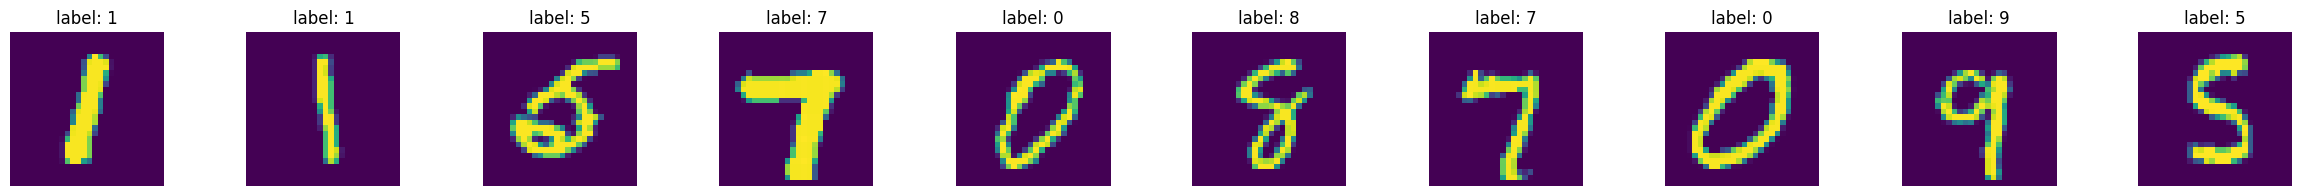

In [89]:
plot_MNIST(x_test, y_test)

In [90]:
class NNetworkMNIST:
    def __init__(self, hidden_size: int, learning_rate: float, max_epoch: int, batch_size: int):
        self.input_size = 784
        self.output_size = 10
        self.hidden_size = hidden_size
        self.learning_rate = learning_rate
        self.max_epoch = max_epoch
        self.batch_size = batch_size

        self.b1 = np.zeros((1, self.hidden_size))
        self.b2 = np.zeros((1, self.output_size))

        self.w1 = np.sqrt(2 / self.input_size) * np.random.randn(self.input_size, self.hidden_size)
        self.w2 = np.sqrt(2 / self.hidden_size) * np.random.randn(self.hidden_size, self.output_size)

    def ReLU(self, array: np.ndarray) -> np.ndarray:
        return np.maximum(array, 0)

    def deri_ReLU(self, array: np.ndarray) -> np.ndarray:
        return np.where(array > 0, 1, 0)

    def softmax(self, array: np.ndarray) -> np.ndarray:
        return np.exp(array) / np.sum(np.exp(array), axis=1, keepdims=True)

    def cross_entropy(self, x: np.ndarray, y: np.ndarray):
        out = 1 - self.forward(x)
        for i in range(out.shape[0]):
            out[i][y[i]] = 1 - out[i][y[i]]
        return -np.sum(np.log(out)) / out.shape[0]
    
    def predict(self, x: np.ndarray):
        return np.argmax(self.forward(x), axis=1)

    def accuracy(self, x: np.ndarray, y_true: np.ndarray):
        y = self.predict(x)
        return np.mean(y == y_true)

    def forward(self, input_data: np.ndarray):
        self.z1 = np.matmul(input_data, self.w1) + self.b1
        self.a1 = self.ReLU(self.z1)
        self.z2 = np.matmul(self.a1, self.w2) + self.b2
        self.a2 = self.softmax(self.z2)

        return self.a2

    def backward(self, input_data: np.ndarray, labels: np.ndarray):
        dz2 = self.a2.copy()
        coeff = self.learning_rate / dz2.shape[0]
        for i in range(dz2.shape[0]):
            dz2[i][labels[i]] -= 1
        dz1 = np.multiply(np.matmul(dz2, self.w2.T), self.deri_ReLU(self.z1))
        self.w2 -= np.matmul(self.a1.T, dz2) * coeff
        self.w1 -= np.matmul(input_data.T, dz1) * coeff

        self.b2 -= np.sum(dz2, axis=0, keepdims=True) * coeff
        self.b1 -= np.sum(dz1, axis=0, keepdims=True) * coeff

    def fit(self, x_train: np.ndarray, y_train: np.ndarray, x_test: np.ndarray, y_test: np.ndarray):
        total_time = 0
        for i in range(1, self.max_epoch + 1):
            start_time = time.time()
            for j in range(0, y_train.shape[0] // self.batch_size):
                x_batch = x_train[self.batch_size * j: self.batch_size * (j + 1)]
                y_batch = y_train[self.batch_size * j: self.batch_size * (j + 1)]
                self.forward(x_batch)
                self.backward(x_batch, y_batch)
            end_time = time.time()
            iter_time = end_time - start_time
            total_time += iter_time
            print(f'Epoch: {i}, loss = {self.cross_entropy(x_train, y_train)}, accuracy = {self.accuracy(x_train, y_train)}, time = {iter_time}')

        print(f'Total time = {total_time}')

        print(f'Test learning: loss = {self.cross_entropy(x_test, y_test)}, accuracy = {self.accuracy(x_test, y_test)}')

In [91]:
convert_data = lambda data: data.reshape((-1, 784)) / 255.

network = NNetworkMNIST(300, 0.1, 20, 32)
network.fit(convert_data(x_train), y_train, convert_data(x_test), y_test)

Epoch: 1, loss = 0.2997423335800453, accuracy = 0.9479333333333333, time = 2.5978474617004395
Epoch: 2, loss = 0.19681604754580215, accuracy = 0.967, time = 2.6437830924987793
Epoch: 3, loss = 0.15129477009888273, accuracy = 0.97455, time = 2.7849254608154297
Epoch: 4, loss = 0.11925207676266608, accuracy = 0.9805, time = 2.6568045616149902
Epoch: 5, loss = 0.09747764831886067, accuracy = 0.9842833333333333, time = 3.984280824661255
Epoch: 6, loss = 0.08239035292169228, accuracy = 0.9872833333333333, time = 3.9412569999694824
Epoch: 7, loss = 0.07060412267104571, accuracy = 0.9890166666666667, time = 4.080307722091675
Epoch: 8, loss = 0.06106468990676955, accuracy = 0.99055, time = 3.96516752243042
Epoch: 9, loss = 0.053712261071766555, accuracy = 0.9918333333333333, time = 2.6252429485321045
Epoch: 10, loss = 0.047039239701642636, accuracy = 0.9932833333333333, time = 2.6198461055755615
Epoch: 11, loss = 0.042138598559499606, accuracy = 0.9942666666666666, time = 2.6142654418945312
Ep

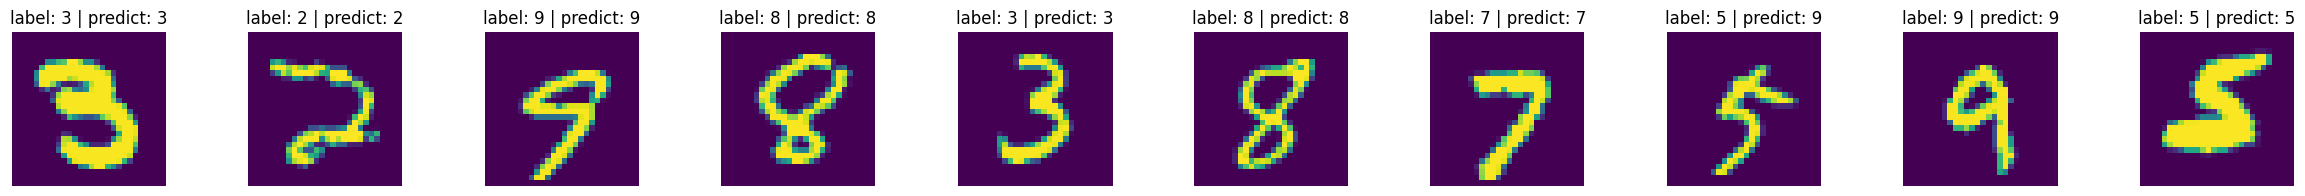

In [92]:
plot_MNIST(x_test, y_test, network.predict(convert_data(x_test)))